<a href="https://colab.research.google.com/github/adzuci/notebooks/blob/master/coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Coronavirus in North America (data visualization)**
#### by David Smolinski
___
<br>

### **Stay safe by seeing how the virus is spreading.**
___
Compare the rate of change of coronavirus (COVID-19) outbreaks throughout North America. I made tables and plots (graphs) for Canada, Mexico, and the United States (including every state). Run this online for daily updates.

Data source: Johns Hopkins University (They claim to get it from the WHO (World Health Organization).)

Most of this work involved filtering and grouping data. 

Please share, like, comment, and subscribe. As of making this, I'm open to employment opportunities and freelance work.
___
<br>

### **Get updates by running the code online.**
___
If this code is in Google Colab, you can run it online to see the most recent data. Johns Hopkins is updating this dataset daily. Change the code to view data with your own custom parameters. For instance, you can set "days=3" and "region=\['Massachusetts', 'New Hampshire'\]" to view outbreaks over 3 days in those 2 states. Lookup how to run Jupyter Notebooks in Google Colab to learn how to do this.
___
<br>

### **Links:**
___
- [Predict whether you are happy on my website.](https://moresomervillehappinessapp.herokuapp.com/home)
- [my code portfolio](https://github.com/DavidSmolinski/portfolio/tree/master/table%20of%20contents)
- [my resume](docs.google.com/document/d/1NmaSZmUnfOo0ZlQYJZyDy648Fhi-4z7evU47rpatxZ4)
- [my LinkedIn](https://www.linkedin.com/in/davidsmolinski/)
- [my Facebook](https://www.facebook.com/david.smolinski.9)
- [Johns Hopkins University's coronavirus page](https://coronavirus.jhu.edu/)
- [the dataset](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv)
- [US regions](https://www2.census.gov/geo/pdfs/maps-data/maps/reference/us_regdiv.pdf)
___
<br>


In [0]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
df = pd.read_csv(url, delimiter=',', index_col = False)
pd.set_option('display.max_columns', None)
print('columns in the original dataset')
df.head(1)

columns in the original dataset


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0,101.0,2,3,5,7,8,8,14,14,14,19,19,19,19,25,25,25,25,32,32,32,33,33,33,33,33,34,35,35,35,35,35,35,35,35,37,40,40,41,42,42,43,43,43,47,48,50,50,50,53,59,70,75,82,114


In [0]:
df = df.rename(columns={'Province/State': 'Province_or_State', 'Country/Region': 'Country_Region',})

def make_country_df(country):
    country_df = df.loc[df.Country_Region == country, :]
    cols_to_drop = ['Country_Region', 'Lat', 'Long']
    country_df = country_df.sort_values(by=['Province_or_State'])
    return country_df.drop(cols_to_drop, axis=1)
    
df_us = make_country_df('US')
df_canada = make_country_df('Canada')
df_mexico = make_country_df('Mexico')

print('data for all the United States locations')
pd.set_option('display.max_rows', None)
df_us

data for all the United States locations


,Province_or_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
243,"Adams, IN",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
419,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6,12
363,"Alachua, FL",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
283,"Alameda County, CA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,0,0,0,0,0,0
142,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
385,"Anoka, MN",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
229,"Arapahoe, CO",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
119,Arizona,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,9,9,9,12,13
143,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,12,16
235,"Arlington, VA",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
northeast = ('Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island',
               'Vermont', 'New Jersey', 'New York', 'Pennsylvania',)
midwest = ('Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 
           'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota',)
south = ('Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 
         'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 
         'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas',)
west = ('Arizona', 'Colorado', 'Idaho', 'New Mexico', 'Montana', 'Utah', 'Nevada', 
        'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington',)
all_states = northeast + midwest + south + west

In [0]:
pd.set_option('display.max_rows', None)
df_us = df_us.loc[df.Province_or_State.isin(all_states), :]
print('data for all states in the United States')
df_us

data for all states in the United States


,Province_or_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
419,Alabama,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,6,12
142,Alaska,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
119,Arizona,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,9,9,9,12,13
143,Arkansas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,6,12,16
101,California,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,177,221,282,340,426
106,Colorado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,34,45,49,101,131
130,Connecticut,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,3,5,11,22,24
144,Delaware,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,6,7
107,Florida,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,28,35,50,76,115
105,Georgia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,23,31,42,66,99


In [0]:
canadian_provinces = ['British Columbia',
 'Ontario',
 'Alberta',
 'Quebec',
 'New Brunswick',
 'Manitoba',
 'Saskatchewan']
print('data for all Canadian locations')
df_canada

data for all Canadian locations


,Province_or_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
94,Alberta,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,4,7,7,19,19,29,29,39
5,British Columbia,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,4,4,4,4,4,4,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7,8,8,8,9,12,13,21,21,27,32,32,39,46,64,64,73
416,Grand Princess,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
410,Manitoba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4
202,New Brunswick,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2
443,Newfoundland and Labrador,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
93,Ontario,0,0,0,0,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,6,6,11,15,18,20,20,22,25,28,29,34,36,41,42,74,79,104
444,Prince Edward Island,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
95,Quebec,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,3,4,4,4,8,9,17,17,24
411,Saskatchewan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2


In [0]:
print('data for all Mexican locations')
df_mexico

data for all Mexican locations


,Province_or_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
47,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,5,5,5,5,6,6,7,7,7,8,12,12,26,41


In [0]:
def plot(region, region_string, days = 'all', df=df_us):
    """
    :param region: [list of strings] states/provinces
    :param region_string: [string] geographic region's name
    :param days: [int] number of days to plot
    :param df: [dataframe]
    """
    region_df = df.loc[df.Province_or_State.isin(region), :]
    region_df = region_df.set_index('Province_or_State')
    region_df = region_df.swapaxes("index", "columns")
    if days != 'all':
        rows = len(df)  
        region_df = region_df.iloc[(rows - days + 3):(rows + 3), :]  
    region_df.plot()
    plt.title(f'Coronavirus: Region: {region_string}, Days:{days}')
    plt.xlabel('day')
    plt.ylabel('total confirmed cases')
    plt.xticks(rotation='vertical')
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.show()
    plt.clf()  

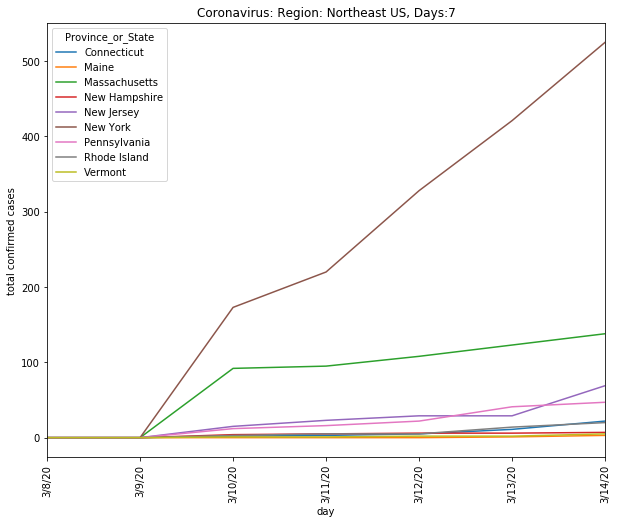

<Figure size 432x288 with 0 Axes>

In [0]:
plot(region=northeast, region_string='Northeast US', days=7)  

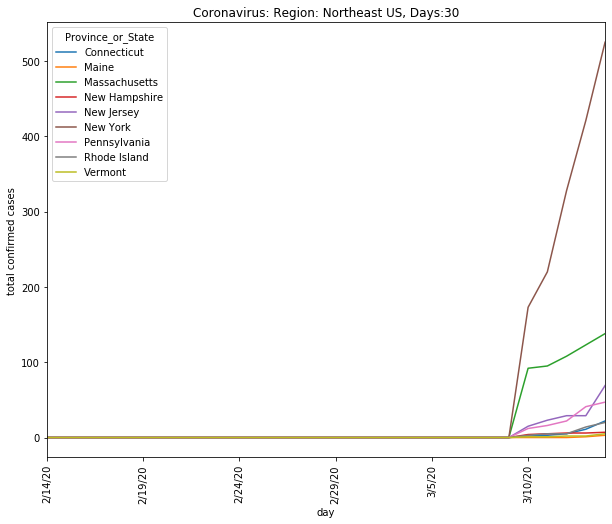

<Figure size 432x288 with 0 Axes>

In [0]:
plot(region=northeast, region_string='Northeast US', days=30)  

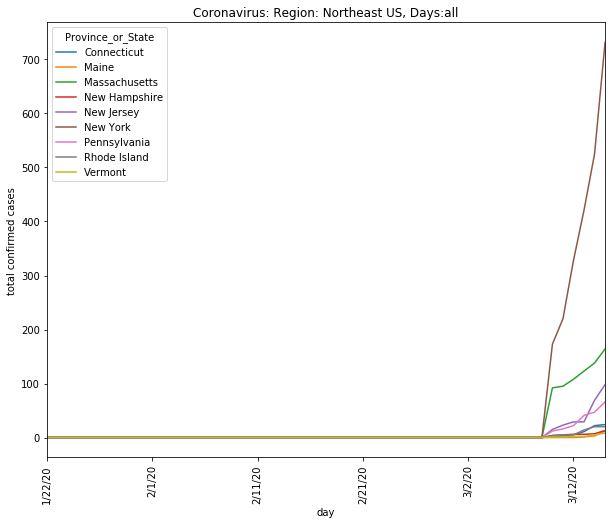

<Figure size 432x288 with 0 Axes>

In [0]:
plot(region=northeast, region_string='Northeast US', days='all')  

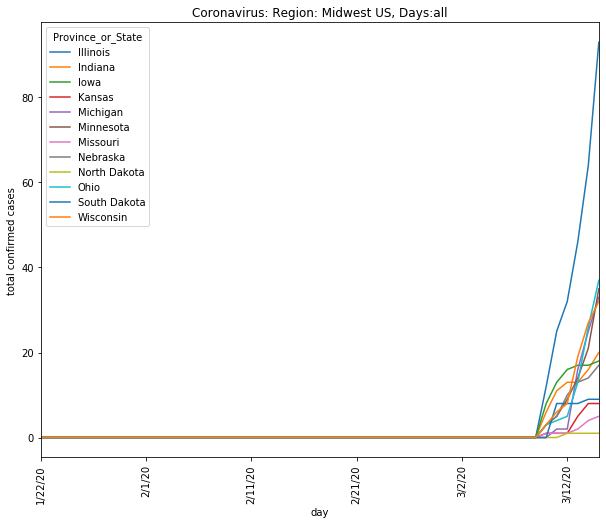

<Figure size 432x288 with 0 Axes>

In [0]:
plot(region=midwest, region_string='Midwest US', days='all')  

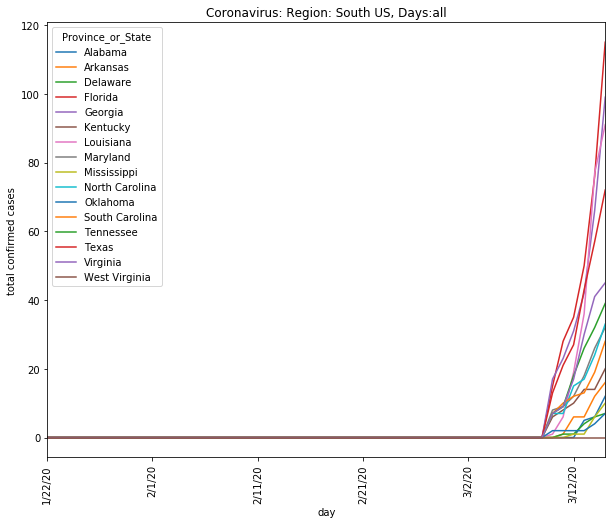

<Figure size 432x288 with 0 Axes>

In [0]:
plot(region=south, region_string='South US', days='all')  

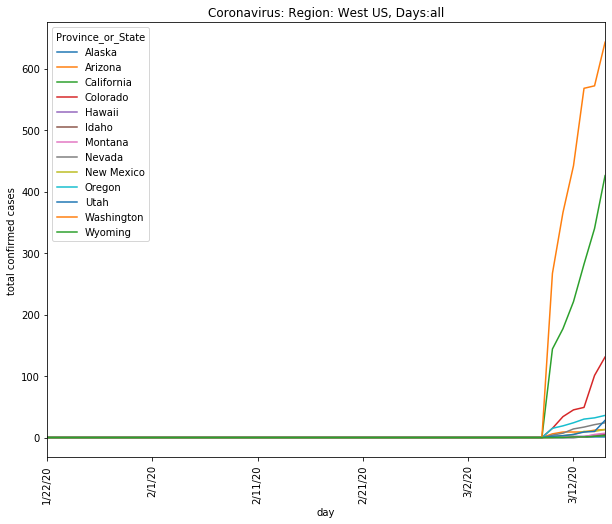

<Figure size 432x288 with 0 Axes>

In [0]:
plot(region=west, region_string='West US', days='all')  

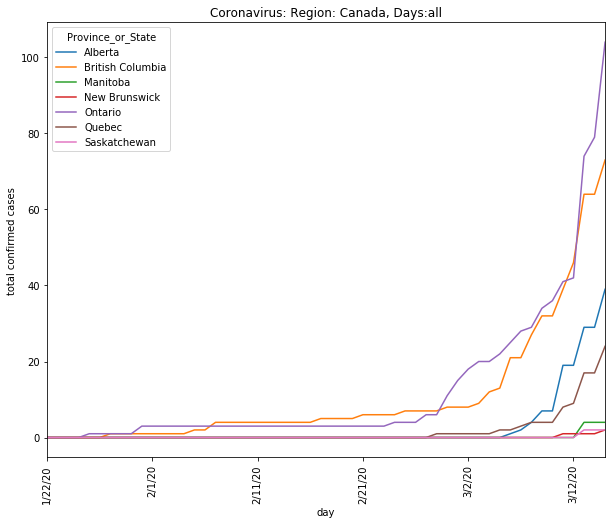

<Figure size 432x288 with 0 Axes>

In [0]:
canadian_provinces = ['British Columbia',
 'Ontario',
 'Alberta',
 'Quebec',
 'New Brunswick',
 'Manitoba',
 'Saskatchewan']
plot(region=canadian_provinces, region_string='Canada', days='all', df=df_canada)

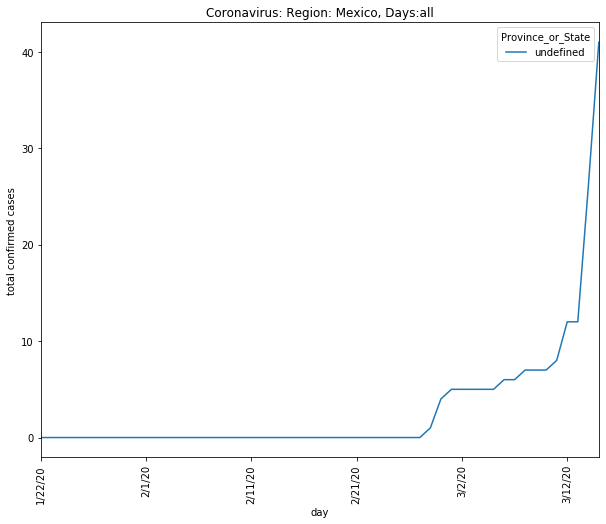

<Figure size 432x288 with 0 Axes>

In [0]:
df_mexico.Province_or_State = df_mexico.Province_or_State.fillna('undefined')
plot(region=['undefined'], region_string='Mexico', days='all', df=df_mexico)